In [1]:
from fastai.vision.all import * #import fastAI/install it if you don't already have it

In [2]:
path = untar_data(URLs.PETS) # download and add the data to the path

In [3]:
path.ls() # show where the data is

(#4) [Path('/home/jules/.fastai/data/oxford-iiit-pet/export.pkl'),Path('/home/jules/.fastai/data/oxford-iiit-pet/models'),Path('/home/jules/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/jules/.fastai/data/oxford-iiit-pet/images')]

In [4]:
files = get_image_files(path/"images")
len(files)

7390

In [5]:
pat = r'^(.*)_\d+.jpg' #getting the breed using the file's name

In [6]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

#creating our data loader

/home/jules/miniconda3/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


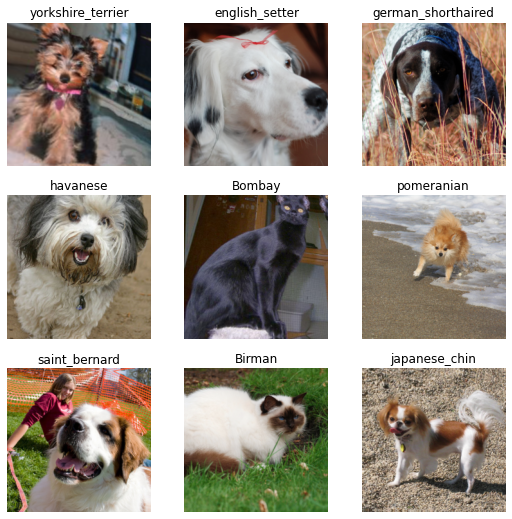

In [25]:
dls.show_batch() 

In [7]:
learn = cnn_learner(dls, resnet34, pretrained = True, metrics=error_rate) #create a learner with the choosen model and parameters)

SuggestedLRs(valley=0.0008317637839354575)

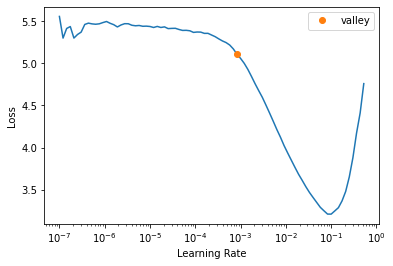

In [8]:
learn.lr_find() #pretraining the beggining of our model to find the right learning rate

In [10]:
learn.fine_tune(5, 8e-3) #change the second value (lr) based on the number that you got

epoch,train_loss,valid_loss,error_rate,time
0,0.563282,0.557006,0.140731,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.587634,0.809422,0.214479,00:31
1,0.725483,0.984478,0.228011,00:31
2,0.527654,0.439629,0.124493,00:31
3,0.274304,0.276210,0.082544,00:32
4,0.151492,0.242289,0.069689,00:34


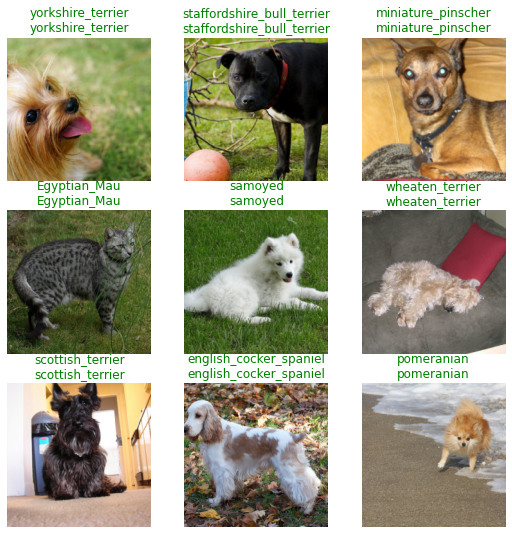

In [30]:
learn.show_results() 

In [28]:
learn.export() #use this to export the modified model